In [101]:
import pandas as pd
from sqlalchemy import create_engine

cnx = create_engine('sqlite:///employees.db').connect()

In [102]:
employee_df = pd.read_sql_table('employee_record', cnx)
attendance_df = pd.read_sql_table('attendance_taken', cnx)

/home/rahilshiraz/cfxdx-venv/lib/python3.7/site-packages/pandas/io/sql.py:240: SAWarning: Could not instantiate type <class 'sqlalchemy.sql.sqltypes.INTEGER'> with reflected arguments ['11']; using no arguments.
  meta.reflect(only=[table_name], views=True)


In [103]:
attendance_df

,id,eid,name,date,attendance
0,1,100,Ankush,2021-02-04,Present
1,2,101,Rahil,2021-02-04,Absent
2,3,102,Arvind,2021-02-04,Present
3,4,100,Ankush,2021-02-05,Present
4,5,101,Rahil,2021-02-05,Present
5,6,102,Arvind,2021-02-05,Absent
6,7,100,Ankush,2021-02-06,Absent
7,8,101,Rahil,2021-02-06,Present
8,9,102,Arvind,2021-02-06,Absent


In [112]:
present_dates = attendance_df[attendance_df['attendance']=='Present']
absent_dates  = attendance_df[attendance_df['attendance']=='Absent']

present_df = pd.DataFrame(present_dates.groupby('date').size().reset_index(name='Employee Present'))
absent_df = pd.DataFrame(absent_dates.groupby('date').size().reset_index(name='Employee Absent'))

df = pd.merge(present_df, absent_df, how='outer')
df.fillna(0, inplace=True)
df.sort_values('date', inplace=True)

Text(0, 0.5, 'EMployees Absent')

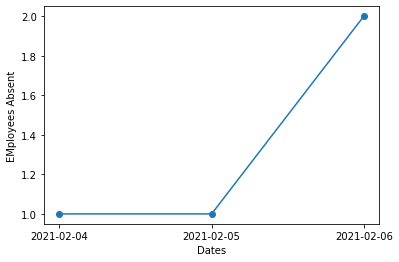

In [117]:
import matplotlib.pyplot as plt
plt.plot(df['date'], df['Employee Absent'], marker='o')
plt.xlabel("Dates")
plt.ylabel("Employees Absent")

Text(0, 0.5, 'Employees Present')

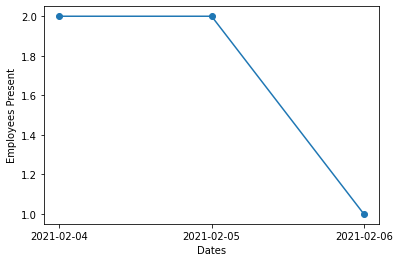

In [118]:
plt.plot(df['date'], df['Employee Present'], marker='o')
plt.xlabel("Dates")
plt.ylabel("Employees Present")

In [108]:
df.to_excel('output.xlsx')